<a href="https://colab.research.google.com/github/skku-kdj/MLRobustness_eval/blob/main/art/attack/evasion/whitebox/Carlini%26Wagner_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import transforms
from torchvision.models import vgg16, resnet50

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
model_vgg = vgg16(pretrained=True)#for compare

model_vgg.eval()
model_vgg.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model_resnet = resnet50(pretrained=True)#for attack

model_resnet.eval()
model_resnet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks/data')

In [ ]:
with open("imagenet-classes.txt") as f:
  classes = [line.strip() for line in f.readlines()]
len(classes)

1000

In [ ]:
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

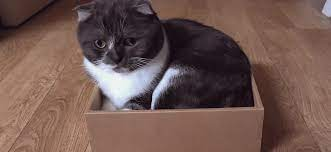

In [ ]:
image = Image.open('cat.jpg')
image

#L2 attack

In [ ]:
!pip install adversarial-robustness-toolbox

In [ ]:
from art.attacks.evasion import FeatureAdversariesPyTorch
from art.estimators.classification import PyTorchClassifier
from art.attacks.evasion import CarliniL2Method

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_res = optim.Adam(model_resnet.parameters(), lr=0.001)
classifier_resnet = PyTorchClassifier(
  model = model_resnet,
  clip_values=(0, 1),
  loss=criterion,
  optimizer=optimizer_res,
  input_shape=(3, 224, 224),
  nb_classes=1000,
)

In [ ]:
attacker = CarliniL2Method(classifier=classifier_resnet, targeted=True, initial_const=10, binary_search_steps=25, max_iter=50, confidence=5)
y_target = np.array([2])
classes[2]

'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias'

In [ ]:
image_tensor = transform(image).unsqueeze(0)
image_numpy = image_tensor.numpy()

adv_image_numpy = attacker.generate(x=image_numpy, y=y_target)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def numpy_to_img(image_numpy):
  image_numpy = image_numpy.squeeze(0)
  image_numpy = image_numpy.transpose(1, 2, 0)
  image = image_numpy * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  return image

In [ ]:
def print_top5(image_numpy, model):
  image_tensor = torch.from_numpy(image_numpy).to(device)
  output = model(image_tensor)
  _, indices = torch.sort(output, descending=True)
  percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
  print([(classes[idx], percentage[idx].item()) for idx in indices[0][:5]])

In [ ]:
print("original")
print_top5(image_numpy, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy, model_resnet)
print("adversarial example to other model")
print_top5(adv_image_numpy, model_vgg)

original
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example
[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 85.32193756103516), ('tiger shark, Galeocerdo cuvieri', 0.5620468854904175), ('sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 0.544032096862793), ('tub, vat', 0.5269355773925781), ('sturgeon', 0.5142242908477783)]
adversarial example to other model
[('vulture', 3.4636027812957764), ('bald eagle, American eagle, Haliaeetus leucocephalus', 2.3869144916534424), ('chest', 2.3194658756256104), ('kite', 2.2057578563690186), ('black grouse', 2.1915342807769775)]


Text(0.5, 1.0, 'adversarial example')

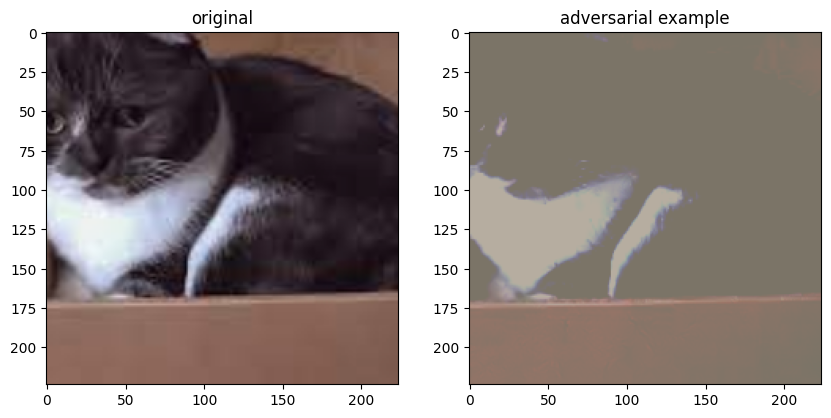

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(numpy_to_img(image_numpy))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy))
ax[1].set_title("adversarial example")

try similar class like dog makes lower noise

In [ ]:
attacker_low = CarliniL2Method(classifier=classifier_resnet, targeted=True, initial_const=10, binary_search_steps=25, max_iter=50, confidence=2)
y_target = np.array([2])

In [ ]:
adv_image_numpy_low = attacker.generate(x=image_numpy, y=y_target)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy, model_resnet)
print("adversarial example lower confidence")
print_top5(adv_image_numpy_low, model_resnet)
print("adversarial example to other model")
print_top5(adv_image_numpy, model_vgg)
print("adversarial example lower confidence to other model")
print_top5(adv_image_numpy_low, model_vgg)

original
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example
[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 85.32193756103516), ('tiger shark, Galeocerdo cuvieri', 0.5620468854904175), ('sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 0.544032096862793), ('tub, vat', 0.5269355773925781), ('sturgeon', 0.5142242908477783)]
adversarial example lower confidence
[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 85.32193756103516), ('tiger shark, Galeocerdo cuvieri', 0.5620468854904175), ('sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita', 0.544032096862793), ('tub, vat', 0.5269355773925781), ('sturgeon', 0.5142242908477783)]
adversarial example to other model
[('vulture', 3.4636027812957764), ('bald eagle, American eagle

Text(0.5, 1.0, 'lower adversarial example')

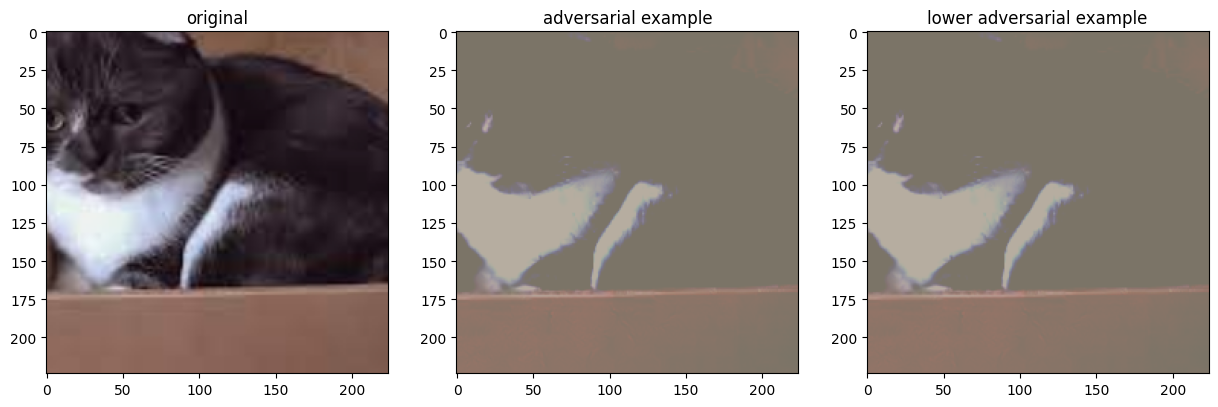

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(numpy_to_img(image_numpy))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy))
ax[1].set_title("adversarial example")
ax[2].imshow(numpy_to_img(adv_image_numpy_low))
ax[2].set_title("lower adversarial example")

In [ ]:
for index in range(1000):
  if classes[index] == "carton":
    print(index)
    break

478


In [ ]:
y_target = np.array([478])
adv_image_numpy = attacker.generate(x=image_numpy, y=y_target)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy, model_resnet)

original
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example
[('carton', 98.8977279663086), ('crate', 0.16792955994606018), ('envelope', 0.08291956037282944), ('cup', 0.04203617572784424), ('candle, taper, wax light', 0.03426723554730415)]


Text(0.5, 1.0, 'adversarial example')

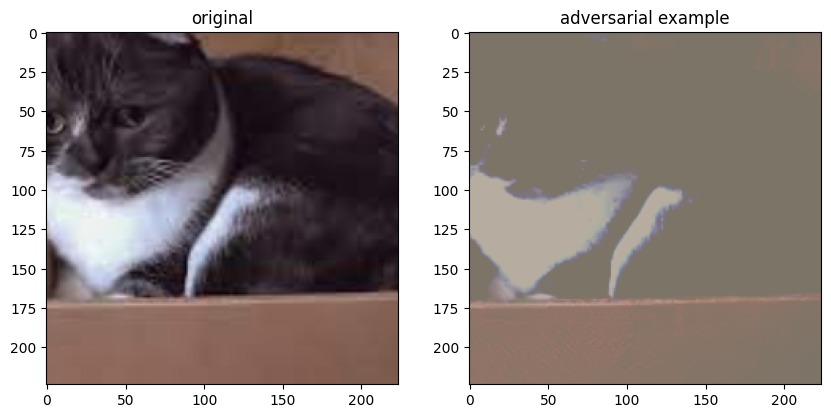

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(numpy_to_img(image_numpy))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy))
ax[1].set_title("adversarial example")

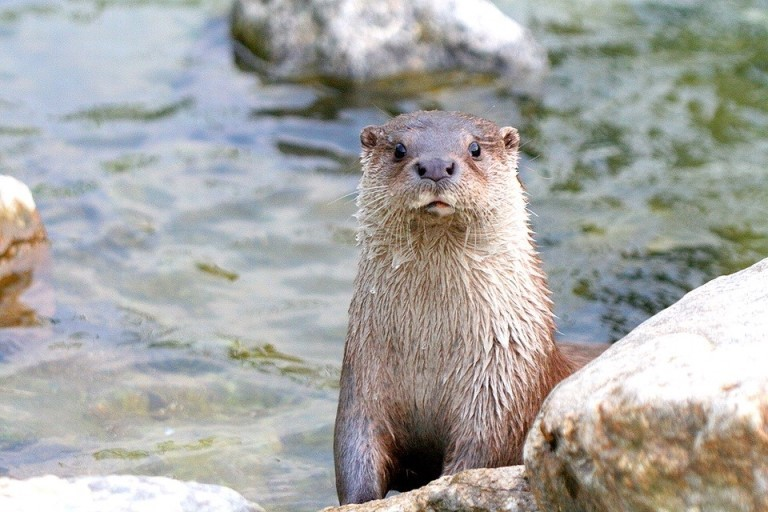

In [ ]:
image2 = Image.open('otter.jpg')
image2

In [ ]:
image_tensor_2 = transform(image2).unsqueeze(0)
image_numpy_2 = image_tensor_2.numpy()

In [ ]:
print_top5(image_numpy_2, model_resnet)

[('otter', 90.13733673095703), ('mink', 6.255529880523682), ('weasel', 2.944474935531616), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.21670500934123993), ('beaver', 0.1692441999912262)]


In [ ]:
for index in range(1000):
  if classes[index] == "weasel":
    print(index)
    break

356


In [ ]:
y_target = np.array([356])

adv_image_numpy_356 = attacker.generate(x=image_numpy_2, y=y_target)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy_2, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy_356, model_resnet)

original
[('otter', 90.13733673095703), ('mink', 6.255529880523682), ('weasel', 2.944474935531616), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.21670500934123993), ('beaver', 0.1692441999912262)]
adversarial example
[('weasel', 98.67428588867188), ('mink', 0.5064660310745239), ('black-footed ferret, ferret, Mustela nigripes', 0.40407347679138184), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.2576368749141693), ('otter', 0.13809508085250854)]


Text(0.5, 1.0, 'adversarial example')

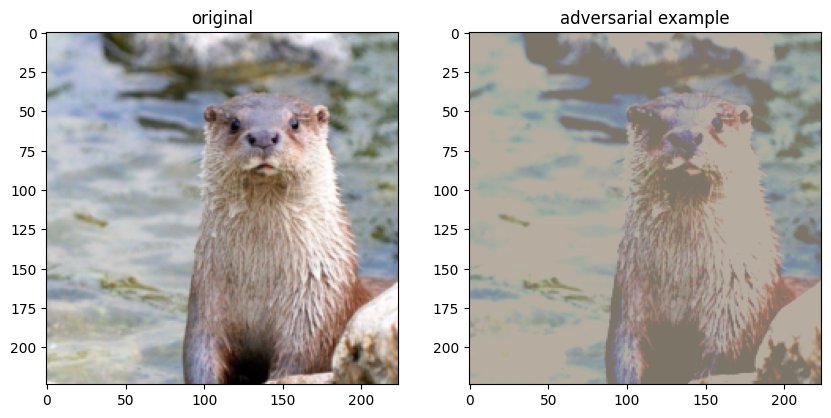

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(numpy_to_img(image_numpy_2))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy_356))
ax[1].set_title("adversarial example")

In [ ]:
y_target = np.array([2])
adv_image_numpy_2 = attacker.generate(x=image_numpy_2, y=y_target)

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy_2, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy_2, model_resnet)

original
[('otter', 90.13733673095703), ('mink', 6.255529880523682), ('weasel', 2.944474935531616), ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.21670500934123993), ('beaver', 0.1692441999912262)]
adversarial example
[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 96.51773071289062), ('hammerhead, hammerhead shark', 0.5498359799385071), ('tiger shark, Galeocerdo cuvieri', 0.48548728227615356), ('sea lion', 0.40631890296936035), ('baseball', 0.3737214505672455)]


Text(0.5, 1.0, 'adversarial example')

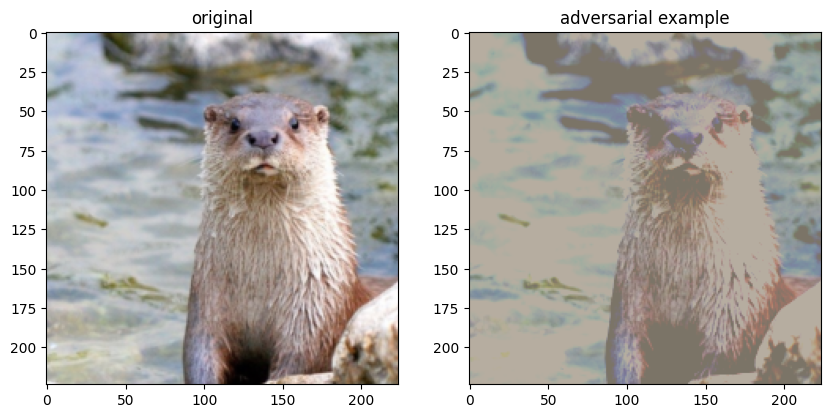

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(numpy_to_img(image_numpy_2))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy_2))
ax[1].set_title("adversarial example")

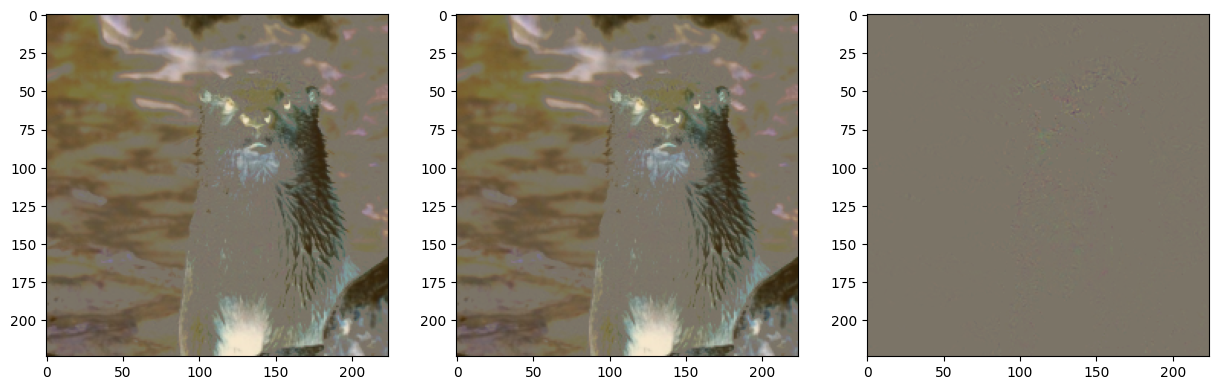

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(numpy_to_img(adv_image_numpy_356 - image_numpy_2))
ax[1].imshow(numpy_to_img(adv_image_numpy_2 - image_numpy_2))
ax[2].imshow(numpy_to_img(adv_image_numpy_356 - adv_image_numpy_2))

In [ ]:
gap = (adv_image_numpy_356 - adv_image_numpy_2).squeeze()
gap

array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -5.4522753e-03,  9.3087554e-03,  2.0552874e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         -4.7385693e-04, -7.5623989e-03,  9.4342232e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          1.4163256e-03,  2.3813844e-03,  2.1232367e-03],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          2.3841858e-07,  0.0000000e+00,  1.9514561e-04],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          1.6689301e-06,  0.0000000e+00, -1.1166036e-03],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00, -6.6107512e-04]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00, 

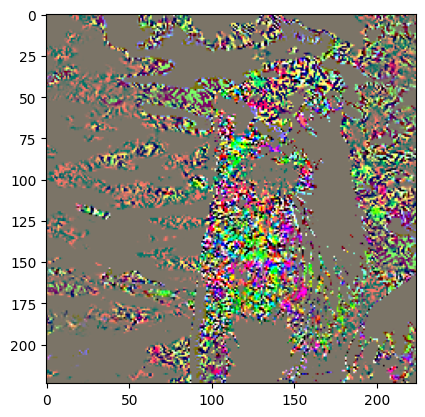

In [ ]:
plt.imshow(numpy_to_img(np.expand_dims(gap, axis=0)*100))

#L intinite attack

In [ ]:
from art.attacks.evasion import CarliniLInfMethod

In [ ]:
attacker_inf = CarliniLInfMethod(classifier=classifier_resnet, targeted=True, initial_const=10, max_iter=100, confidence=10, decrease_factor=0.99)

In [ ]:
adv_image_numpy_inf = attacker_inf.generate(x=image_numpy, y=y_target)

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy_inf, model_resnet)
print("adversarial example to other model")
print_top5(adv_image_numpy_inf, model_vgg)

original
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example to other model
[('Persian cat', 35.44462966918945), ('Siamese cat, Siamese', 29.433319091796875), ('Egyptian cat', 21.537017822265625), ('tabby, tabby cat', 5.356883525848389), ('hamper', 0.8564673662185669)]


Text(0.5, 1.0, 'adversarial example')

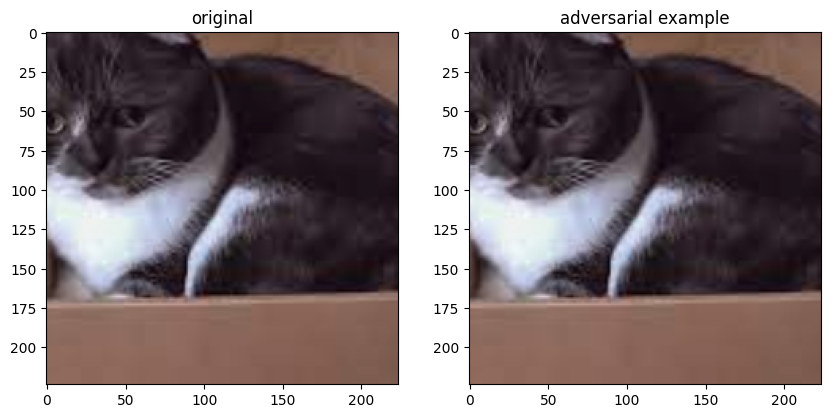

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(numpy_to_img(image_numpy))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy_inf))
ax[1].set_title("adversarial example")

In [ ]:
adv_image_numpy_inf_low = attacker_inf.generate(x=image_numpy, y=y_target, initial_const=10, max_iter=50, confidence=1.5)

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("original")
print_top5(image_numpy, model_resnet)
print("adversarial example")
print_top5(adv_image_numpy_inf, model_resnet)
print("adversarial example lower confidence")
print_top5(adv_image_numpy_inf_low, model_resnet)
print("adversarial example to other model")
print_top5(adv_image_numpy_inf, model_vgg)
print("adversarial example lower confidence to other model")
print_top5(adv_image_numpy_inf_low, model_vgg)

original
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example lower confidence
[('Egyptian cat', 42.351470947265625), ('tabby, tabby cat', 19.48757553100586), ('carton', 7.69890022277832), ('Siamese cat, Siamese', 5.576511859893799), ('screen, CRT screen', 2.9785919189453125)]
adversarial example to other model
[('Persian cat', 35.44462966918945), ('Siamese cat, Siamese', 29.433319091796875), ('Egyptian cat', 21.537017822265625), ('tabby, tabby cat', 5.356883525848389), ('hamper', 0.8564673662185669)]
adversarial example lower confidence to other model
[('Persian cat', 35.44462966918945), ('Siamese cat, Siam

Text(0.5, 1.0, 'lower adversarial example')

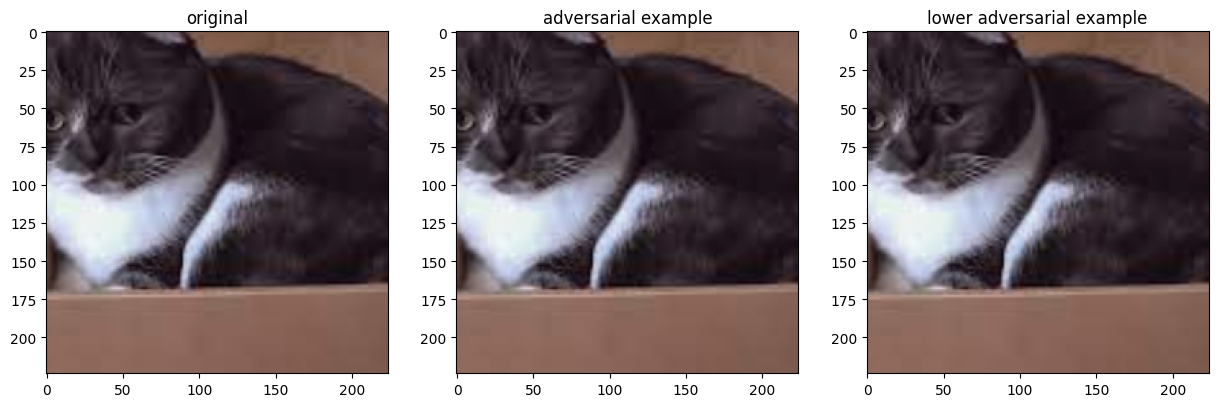

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(numpy_to_img(image_numpy))
ax[0].set_title("original")
ax[1].imshow(numpy_to_img(adv_image_numpy_inf))
ax[1].set_title("adversarial example")
ax[2].imshow(numpy_to_img(adv_image_numpy_inf_low))
ax[2].set_title("lower adversarial example")